In [15]:
from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

import pickle

import numpy as np

# Terminally-blocked amino acids

## Retrieve maximum of diagonals (ACE-X-NME)

In [41]:
max_diagonals = []
for sub_dir in tqdm_notebook(range(20)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/{sub_dir}/replicate_0/{sub_dir}_apo.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    n_states = transition_matrix.shape[0]
    diagonals = [transition_matrix[state_index][state_index] for state_index in range(n_states)]
    max_diagonals.append(max(diagonals))

/scratch/lsftmp/11715100.tmpdir/ipykernel_50858/2194190649.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(20)):


  0%|          | 0/20 [00:00<?, ?it/s]

In [42]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/max_diagonals.pickle", "wb") as f:
    pickle.dump(max_diagonals, f)

## Retrieve maximum of diagonals (ALA-X-ALA)

In [43]:
max_diagonals = []
for sub_dir in tqdm_notebook(range(20, 40)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/{sub_dir}/replicate_0/{sub_dir}_apo.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    n_states = transition_matrix.shape[0]
    diagonals = [transition_matrix[state_index][state_index] for state_index in range(n_states)]
    max_diagonals.append(max(diagonals))

/scratch/lsftmp/11715100.tmpdir/ipykernel_50858/3634508974.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(20, 40)):


  0%|          | 0/20 [00:00<?, ?it/s]

In [44]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/max_diagonals_ala.pickle", "wb") as f:
    pickle.dump(max_diagonals, f)

## Plot terminally-blocked amino acid experiments (46/0-39)

In [6]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/max_diagonals.pickle", "rb") as f:
    max_diagonals = pickle.load(f)

In [7]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/max_diagonals_ala.pickle", "rb") as f:
    max_diagonals_ala = pickle.load(f)

In [4]:
print(max_diagonals_ala.index(max(max_diagonals_ala)))
print(max_diagonals.index(max(max_diagonals)))
print(max_diagonals_ala.index(min(max_diagonals_ala)))
print(max_diagonals.index(min(max_diagonals)))

11
11
13
13


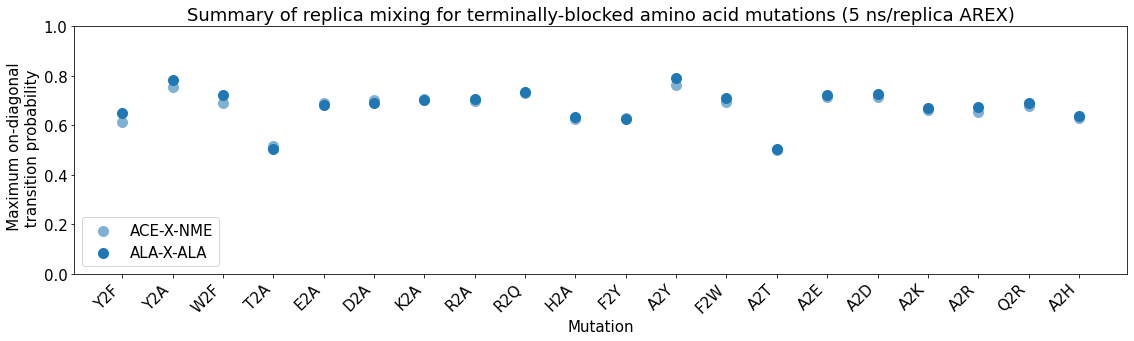

<Figure size 432x288 with 0 Axes>

In [9]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(16,5), squeeze=True)

# Set font size
plt.rc('font', size=15)

# Plot
labels = ["Y2F", "Y2A", "W2F", "T2A", "E2A", "D2A", "K2A", "R2A", "R2Q", "H2A", "F2Y", "A2Y", "F2W", "A2T", "A2E", "A2D", "A2K", "A2R", "Q2R", "A2H"]
plt.scatter(labels, max_diagonals, color="#80b1d3", s=100, label="ACE-X-NME")
plt.scatter(labels, max_diagonals_ala, s=100, label="ALA-X-ALA")

plt.xlabel("Mutation")
plt.ylabel("   Maximum on-diagonal \n transition probability")
plt.xticks(rotation=45, ha='right')
plt.ylim([0.0, 1.0])

# Set title
plt.title("Summary of replica mixing for terminally-blocked amino acid mutations (5 ns/replica AREX)")
        
# Ensure x-axis labels are not cut off
plt.tight_layout()

# Show legend
plt.legend(loc="lower left")

# Save plot as pdf
save_path = "/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/46/replica_mixing_summary_dipeptide.pdf"
plt.savefig(save_path, dpi=500)
plt.show()
plt.clf()


# Barnase:barstar (AREX)

## Retrieve maximum of diagonals (apo)

In [2]:
max_diagonals = []
main_dir = 47
other_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in tqdm_notebook(range(28)):
    
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    
    if sub_dir in [4, 12, 17]:
        main_dir = 45
        sub_dir = d_mapping[sub_dir]
    else:
        main_dir = 47
    
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_apo.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    n_states = transition_matrix.shape[0]
    diagonals = [transition_matrix[state_index][state_index] for state_index in range(n_states)]
    max_diagonals.append(max(diagonals))

/scratch/lsftmp/13803149.tmpdir/ipykernel_51522/3057775619.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(28)):


  0%|          | 0/28 [00:00<?, ?it/s]

In [3]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/max_diagonals_apo.pickle", "wb") as f:
    pickle.dump(max_diagonals, f)

## Retrieve maximum of diagonals (complex)

In [4]:
max_diagonals = []
main_dir = 47
other_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in tqdm_notebook(range(28)):
    
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    
    if sub_dir in [4, 12, 17]:
        main_dir = 45
        sub_dir = d_mapping[sub_dir]
    else:
        main_dir = 47
        
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_complex.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    n_states = transition_matrix.shape[0]
    diagonals = [transition_matrix[state_index][state_index] for state_index in range(n_states)]
    max_diagonals.append(max(diagonals))

/scratch/lsftmp/13803149.tmpdir/ipykernel_51522/1690658234.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(28)):


  0%|          | 0/28 [00:00<?, ?it/s]

In [5]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/max_diagonals_complex.pickle", "wb") as f:
    pickle.dump(max_diagonals, f)

## Plot bnbs experiments (47/0-27)

In [8]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/max_diagonals_apo.pickle", "rb") as f:
    max_diagonals_apo = pickle.load(f)

In [9]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/max_diagonals_complex.pickle", "rb") as f:
    max_diagonals_complex = pickle.load(f)

In [8]:
print(max_diagonals_apo.index(max(max_diagonals_apo)))
print(max_diagonals_complex.index(max(max_diagonals_complex)))
print(max_diagonals_apo.index(min(max_diagonals_apo)))
print(max_diagonals_complex.index(min(max_diagonals_complex)))

11
7
27
27


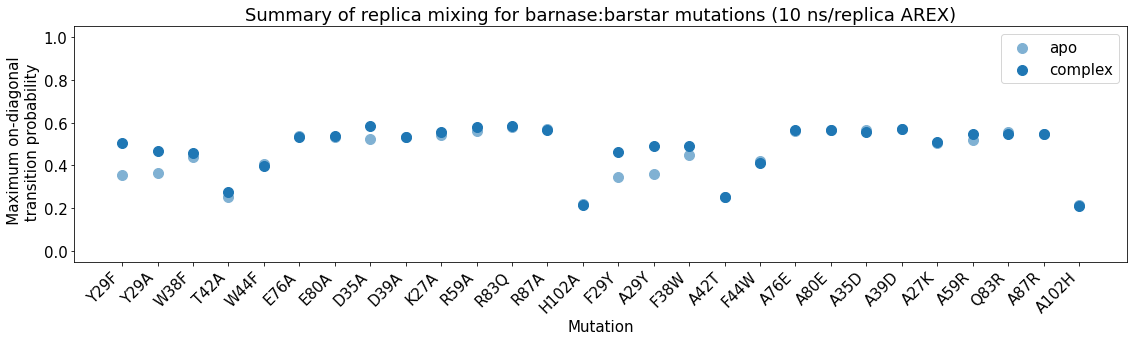

<Figure size 432x288 with 0 Axes>

In [10]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(16,5), squeeze=True)

# Set font size
plt.rc('font', size=15)

# Plot
labels = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]
plt.scatter(labels, max_diagonals_apo, color="#80b1d3", s=100, label="apo")
plt.scatter(labels, max_diagonals_complex, s=100, label="complex")

plt.xlabel("Mutation")
plt.ylabel("   Maximum on-diagonal \n transition probability")
plt.xticks(rotation=45, ha='right')
plt.ylim([-0.05, 1.05])

# Set title
plt.title("Summary of replica mixing for barnase:barstar mutations (10 ns/replica AREX)")
        
# Ensure x-axis labels are not cut off
plt.tight_layout()

# Show legend
plt.legend()

# Save plot as pdf
save_path = "/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/replica_mixing_summary_bnbs.pdf"
plt.savefig(save_path, dpi=500)
plt.show()
plt.clf()


In [13]:
max_diagonals_apo[11]

0.5816493161869769

In [14]:
max_diagonals_complex[7]

0.5843604768640129

# Barnase:barstar (AREST)

## Retrieve maximum of diagonals (complex)

In [2]:
max_diagonals = []
main_dir = 52
for sub_dir in tqdm_notebook(range(28)):
    
    if sub_dir in [19, 21]:
        replicate = 1
    else:
        replicate = 0
    
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_complex.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    n_states = transition_matrix.shape[0]
    diagonals = [transition_matrix[state_index][state_index] for state_index in range(n_states)]
    max_diagonals.append(max(diagonals))

/scratch/lsftmp/14495101.tmpdir/ipykernel_55678/3356713608.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(28)):


  0%|          | 0/28 [00:00<?, ?it/s]

In [3]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/max_diagonals_complex.pickle", "wb") as f:
    pickle.dump(max_diagonals, f)

## Plot bnbs experiments (52/0-27)

In [11]:
with open("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/max_diagonals_complex.pickle", "rb") as f:
    max_diagonals_complex = pickle.load(f)

In [3]:
print(max_diagonals_complex.index(max(max_diagonals_complex)))
print(max_diagonals_complex.index(min(max_diagonals_complex)))

2
27


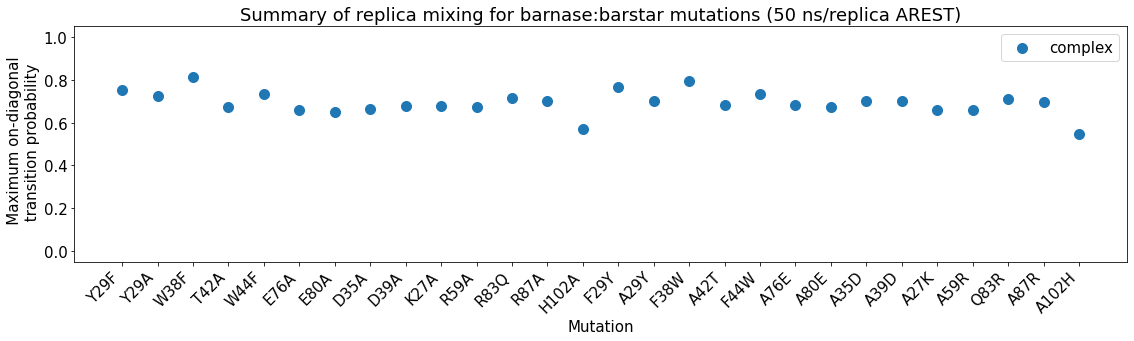

<Figure size 432x288 with 0 Axes>

In [12]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(16,5), squeeze=True)

# Set font size
plt.rc('font', size=15)

# Plot
labels = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]
plt.scatter(labels, max_diagonals_complex, s=100, label="complex")

plt.xlabel("Mutation")
plt.ylabel("   Maximum on-diagonal \n transition probability")
plt.xticks(rotation=45, ha='right')
plt.ylim([-0.05, 1.05])

# Set title
plt.title("Summary of replica mixing for barnase:barstar mutations (50 ns/replica AREST)")
        
# Ensure x-axis labels are not cut off
plt.tight_layout()

# Show legend
plt.legend()

# Save plot as pdf
save_path = "/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/replica_mixing_summary_bnbs_rest.pdf"
plt.savefig(save_path, dpi=500)
plt.show()
plt.clf()


In [6]:
max_diagonals_complex[2]

0.8120934179158754

In [3]:
max_diagonals_complex[12]

0.7028331065198565

In [4]:
max_diagonals_complex[17]

0.6798860560022627

In [5]:
max_diagonals_complex[27]

0.5479009252899107